In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rand 
from numba import jit, objmode
from scipy.stats import geom, expon 

## Extension 1 - 3 numbers, 2 differences ##

In [3]:
@jit
def ext1(n):
    hat = list(range(1,n+1))
    l = len(hat)
    #print(hat)
    while l > 2:
        x_index = int(l*rand.random())
        y_index = int(l*rand.random())
        z_index = int(l*rand.random())
        while y_index == x_index:
            y_index = int(l*rand.random())
        while (z_index == x_index) or (z_index == y_index):
            z_index = int(l*rand.random())
        x,y,z = hat[x_index],hat[y_index], hat[z_index]
        dif1 = np.abs(x-y)
        dif2 = np.abs(x-z)
        dif3 = np.abs(y-z)
        maxi = max(dif1, dif2, dif3)
        mini = min(dif1, dif2, dif3)
        hat.remove(x)
        hat.remove(y)
        hat.remove(z)
        #print(hat)
        hat.append(maxi)
        hat.append(mini)
        l = len(hat)
        #print(l)
    hat_number = np.abs(hat[0]-hat[1])
    return hat_number

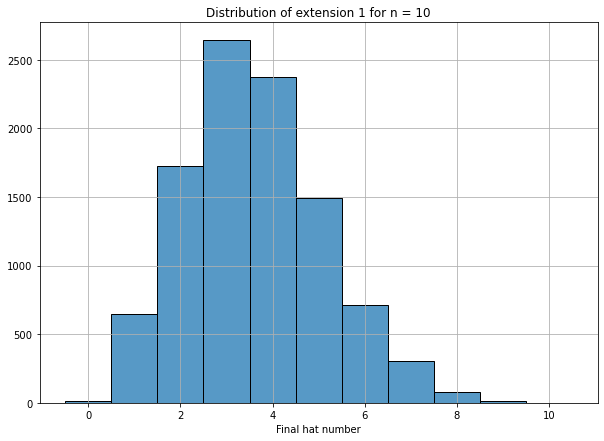

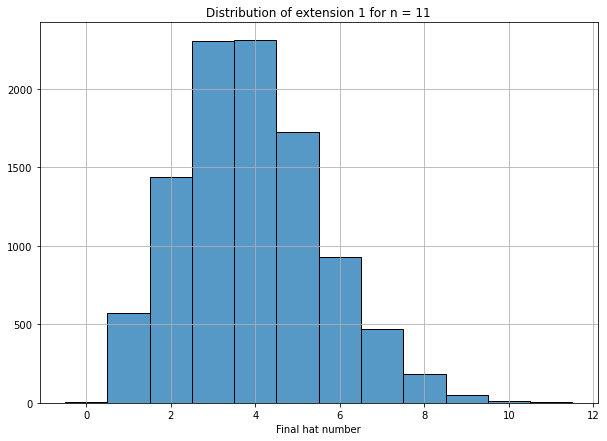

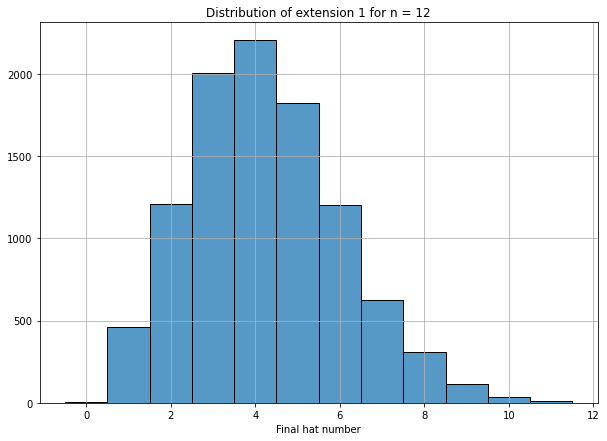

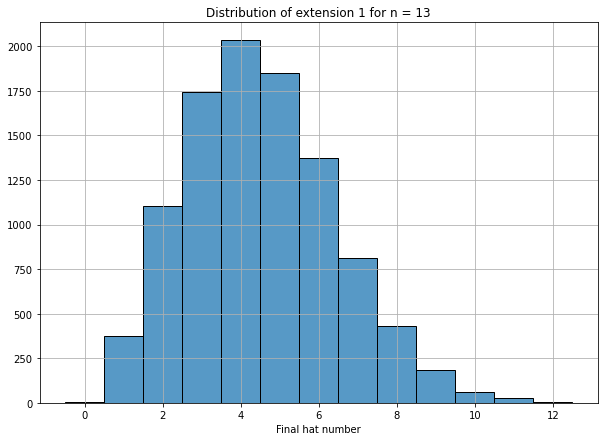

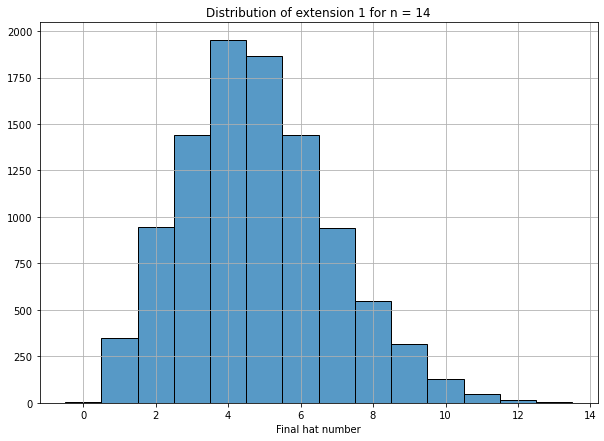

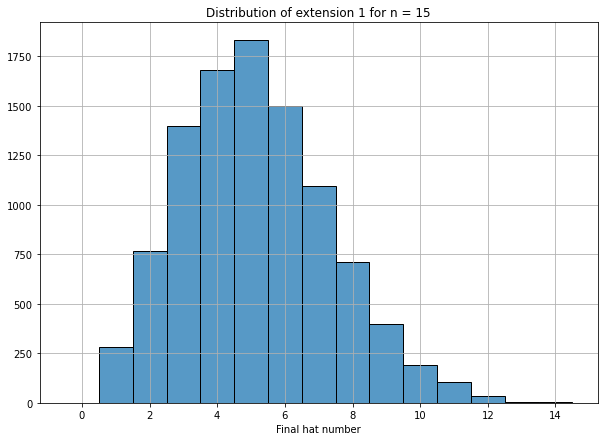

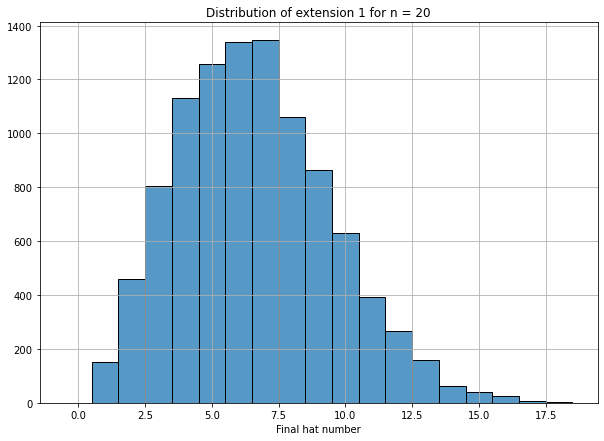

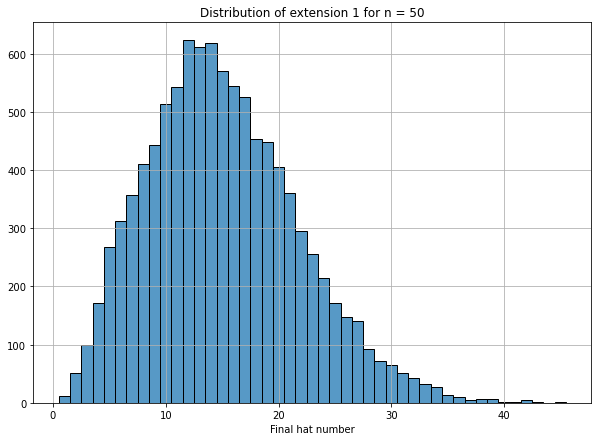

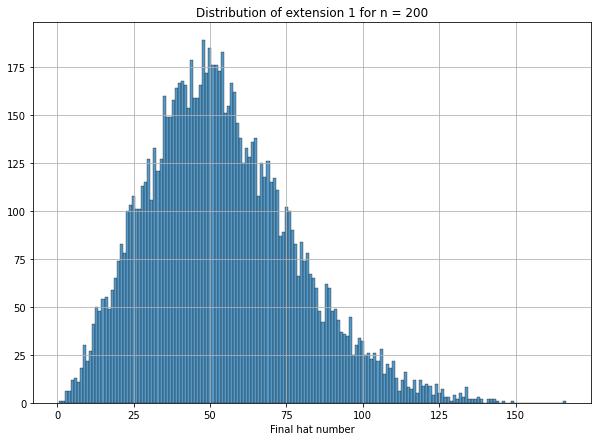

In [5]:
trials = int(1e4)
n_array = [10,11,12,13,14,15,20,50,200]
for n in n_array:
    final_number = []
    bins = np.arange(0,n+2)-0.5

    for i in range(trials):
        x = ext1(n)
        final_number.append(x)
    
    fig,ax = plt.subplots(1,1,figsize = (10,7))
    sns.histplot(final_number, stat = 'count', ax=ax, discrete = True)
    ax.set_title(f'Distribution of extension 1 for n = {n}') 
    x2 = np.linspace(min(final_number), max(final_number))
    ax.set_ylabel('')
    ax.set_xlabel('Final hat number')

    ax.grid('on')

    plt.show()

## Extension 2 - different probabilities

In [6]:
@jit
def ext2(n):
    hat1 = list(range(1,n+1))
    hat2 = []
    l1 = len(hat1)
    l2 = len(hat2)
    #print(hat)
    while l1 > 1:
        x_index = int(l1*rand.random())
        y_index = int(l1*rand.random())
        while y_index == x_index:
            y_index = int(l1*rand.random())
        x,y = hat1[x_index],hat1[y_index]
        z = np.abs(x-y)
        hat1.remove(x)
        hat1.remove(y)
        hat2.append(z)
        #print(hat)
        l1 = len(hat1)
        #print(l)
    if l1 == 1:
        x = hat1[0]
        y_index = int(l2*rand.random())
        y = hat2[y_index]
        z = np.abs(x-y)
        hat1.remove(x)
        hat2.remove(y)
        hat2.append(z)
        #print(hat)
        l1 = 0
        l2 = len(hat2)
    while l2 > 1:
        x_index = int(l2*rand.random())
        y_index = int(l2*rand.random())
        while y_index == x_index:
            y_index = int(l2*rand.random())
        x,y = hat2[x_index],hat2[y_index]
        z = np.abs(x-y)
        hat2.remove(x)
        hat2.remove(y)
        hat2.append(z)
        #print(hat)
        l2 = len(hat2)
        #print(l)
    return hat2[0]

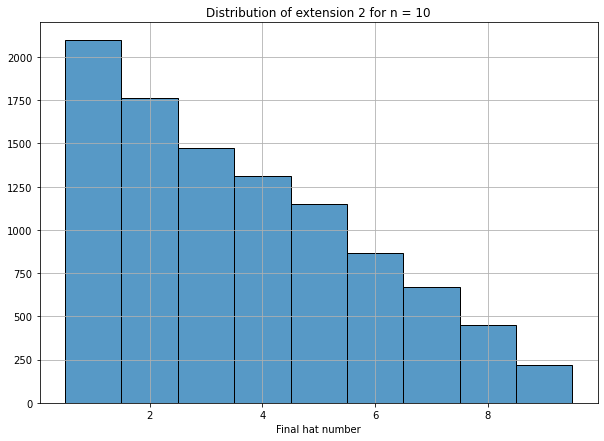

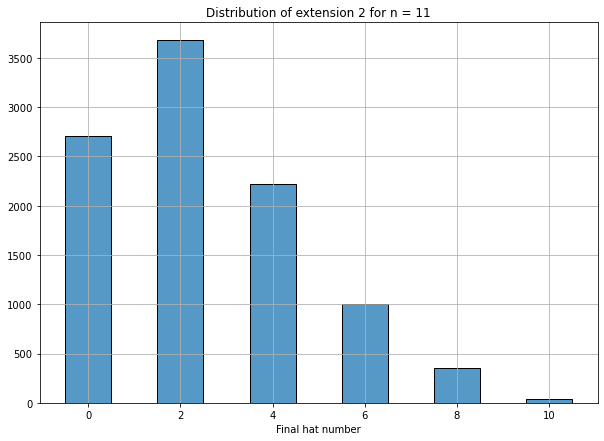

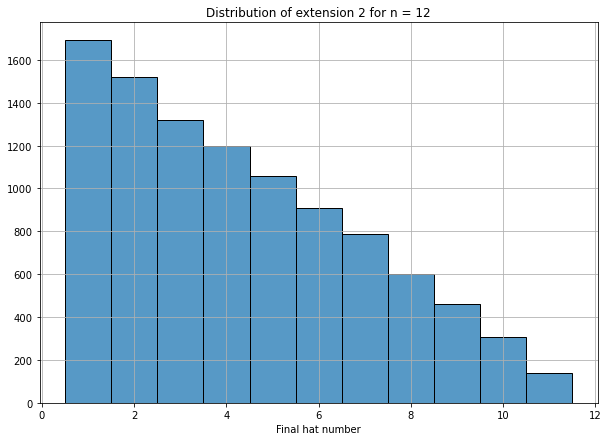

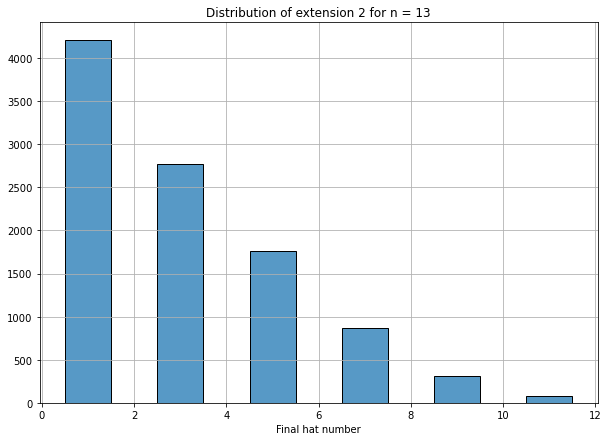

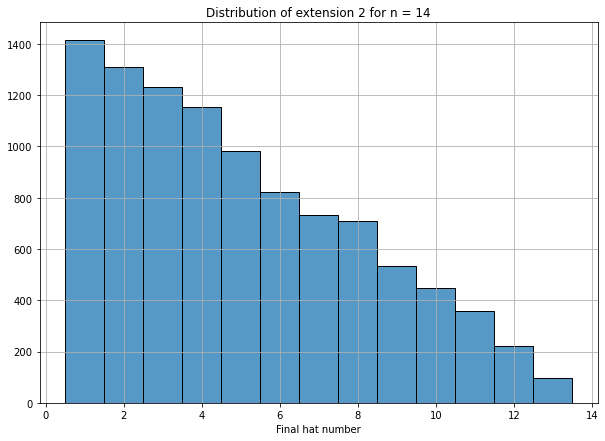

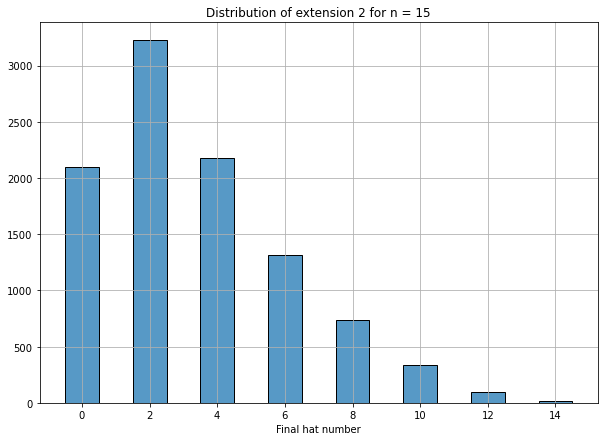

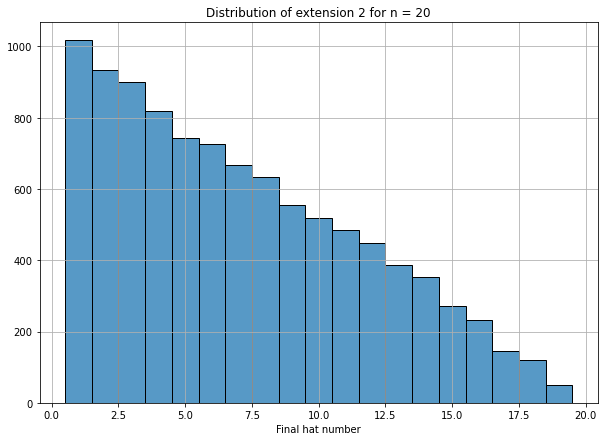

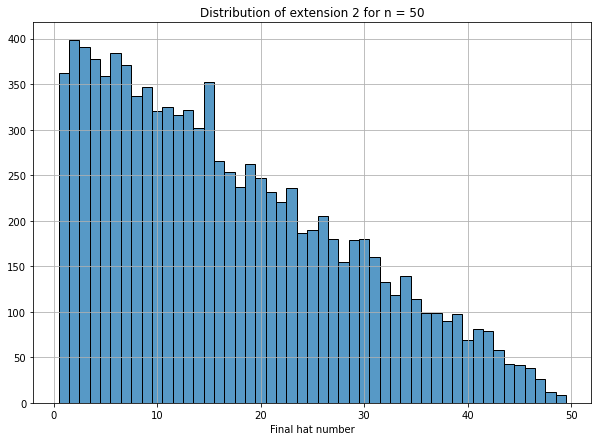

In [8]:
trials = int(1e4)
n_array = [10,11,12,13,14,15,20,50]
for n in n_array:
    final_number = []
    bins = np.arange(0,n+2)-0.5

    for i in range(trials):
        x = ext2(n)
        final_number.append(x)
    
    fig,ax = plt.subplots(1,1,figsize = (10,7))
    sns.histplot(final_number, stat = 'count', ax=ax, discrete = True)
    ax.set_title(f'Distribution of extension 2 for n = {n}') 
    x2 = np.linspace(min(final_number), max(final_number))
    ax.set_ylabel('')
    ax.set_xlabel('Final hat number')

    ax.grid('on')

    plt.show()